In [1]:
#Import required models
import tensorflow as tf
from PIL import Image
from random import shuffle, choice
import numpy as np
import os
from tensorflow.keras import datasets, layers, models
import datetime
import matplotlib.pyplot as plt

#stop the execution from hanging, add this line to run training without interruption
os.environ ['KMP_DUPLICATE_LIB_OK'] = 'True'
print(tf.__version__)

2.16.1


In [3]:
#One hot encode
IMAGE_SIZE = 256
def one_hot_encode(className):
  '''One-hot encodes a given class'''
  if className == 'cats':return np.array([1,0])
  elif className =='nocats': return np.array([0,1])

In [5]:
#data loader method
def load_data (IMAGE_DIRECTORY, number_of_images = 100, shuffle_data = True,dataSetType=None, tType="training" ):
  '''Loads the required image data'''
  if dataSetType is None:
    dataSetType =[]

  print('loading images...')
  folders = next(os.walk(IMAGE_DIRECTORY))[1] # getting the sub directories

  for folder_name in folders:
    if folder_name: # ensure folder_name is not empty
      print(f'loading {folder_name}')
      file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, folder_name)))[2]
      for i in range(min(number_of_images, len(file_names))):
        image_name = choice(file_names)
        image_path=os.path.join(IMAGE_DIRECTORY, folder_name, image_name)

        if "DS_Store" not in  image_path:
          try:
              label = one_hot_encode(folder_name)
              class_name = folder_name
              img = Image.open(image_path) #Image.open() is part of the PILLOW library
              img = img.convert('L') #converts the image to grayscale
              img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.LANCZOS) # resize and improve quality
              dataSetType.append([np.array(img), label, class_name]) # class name is only needed for visualisation
          except ValueError as e:
            print(e)
          except Exception as e:
            print(f'Error loading image {image_path}: {e}')
  if(shuffle_data == True):
    shuffle(dataSetType)
  print(f'we loaded, {len(dataSetType)}, images in the {tType} dataset')
  return dataSetType

In [6]:
#Load and reshape test data
#load test data
t0 = datetime.datetime.now()
IMAGE_DIRECTORY = 'datasets/test_set'
test_data = load_data(IMAGE_DIRECTORY, number_of_images=100, shuffle_data=True, dataSetType=[], tType="testing")
t1 = datetime.datetime.now()
print(f'Time taken to load data: {t1-t0}')

#reshape input arrays for the model
test_images = np.array([i[0] for i in test_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
test_labels = np.array([i[1] for i in test_data])
print(test_images.shape)
print(test_labels.shape)

loading images...
loading cats
loading nocats
we loaded, 200, images in the testing dataset
Time taken to load data: 0:00:01.656153
(200, 256, 256, 1)
(200, 2)


#### Load the model

In [10]:
print('Loading model...')
model = tf.keras.models.load_model('model_cnn1.h5')

Loading model...


#### Evaluating the model

In [11]:
print('Testing Model...')
loss, acc = model.evaluate(test_images, test_labels, verbose =0)

Testing Model...


In [13]:
#print model evaluation info
print(f'Accuracy:{acc*100}')

Accuracy:60.00000238418579


nocats


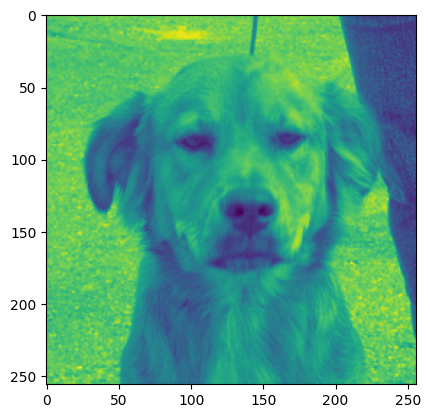

In [22]:
image_index = 52
label = test_data[image_index][2]
print(label)
image = plt.imshow(test_data[image_index][0])

In [19]:
print(test_data[image_index][0].shape)
img = test_data[image_index][0]

(256, 256)


In [23]:
img = img.reshape(1, IMAGE_SIZE, IMAGE_SIZE, 1).astype('float') # batch number =1 because we only provide one image
print(img.shape) # input to the neural network which is now the same shape as the training input
prediction = model.predict(img)
print(prediction)

(1, 256, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.11539556 0.8846044 ]]


In [24]:
if (prediction[0][0]>prediction [0][1]):
  print('CAT')
else:
  print('NOT CAT')

NOT CAT
